# Sentence Embedding - Présentation générale

* Ce notebook présente différentes techniques de "Sentence Embeddings", permettant de générer des features à partir de phrases (ici des tweets)
* L'objectif est de pouvoir séparer les sentiments des tweets de façon automatique, via un T-SNE, qui permet une réduction des features en 2 dimensions
* C'est un notebook d'exemples afin de mieux comprendre la mise en oeuvre des techniques. Il n'est pas optimisé et doit être adapté à un nouveau contexte, en particulier sur les points suivants :
    * Le nettoyage des textes
    * les modèles BERT (model_type) idéalement pré-entraînés sur des données similaires au contexte (ici le modèle 'cardiffnlp/twitter-roberta-base-sentiment' surperforme le modèle de base car il a été pré-entraîné sur des tweets)
    * La taille des vecteurs (max_length)
    * Le batch_size
    * La perplexité du Tsne (perplexity à 30 par défaut)

# Préparation initiale dataset

## Récupération du dataset et filtres de données

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fichier des tweets à récupérer sur : https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv
path = '/Users/matrice/Documents/Projet_6/Flipkart 2' # à adapter = répertoire de stockage du dataset
data_T0 = pd.read_csv(path + "/flipkart_com-ecommerce_sample_1050.csv")
print(data_T0.shape)

(1050, 15)


In [6]:
data_T0

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [3]:
description = []
for i in data_T0['product_category_tree']:
        sentence_clean = i.replace('[', '').replace(']', '').replace('"', ' ').replace('#', ' ')
        description.append(sentence_clean)

In [4]:
data_T0["desc_name"] = data_T0["product_name"] +' '+  data_T0["description"]

In [5]:
data_T0['product_category_tree'] = description

In [6]:
cat = []
for i in data_T0['product_category_tree']:
    cat.append(i.split('>>'))

In [7]:
data_T0['product_category_tree'] = cat

In [8]:
main_cat = []
subcat = []
subsubcat = []
for i in data_T0['product_category_tree']:
    print(i)
    main_cat.append(i[0])
    subcat.append(i[1])

[' Home Furnishing ', ' Curtains & Accessories ', ' Curtains ', ' Elegance Polyester Multicolor Abstract Eyelet Do... ']
[' Baby Care ', ' Baby Bath & Skin ', ' Baby Bath Towels ', ' Sathiyas Baby Bath Towels ', ' Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y... ']
[' Baby Care ', ' Baby Bath & Skin ', ' Baby Bath Towels ', ' Eurospa Baby Bath Towels ', ' Eurospa Cotton Terry Face Towel Set (20 PIECE FA... ']
[' Home Furnishing ', ' Bed Linen ', ' Bedsheets ', ' SANTOSH ROYAL FASHION Bedsheets ', ' SANTOSH ROYAL FASHION Cotton Printed King sized ... ']
[' Home Furnishing ', ' Bed Linen ', ' Bedsheets ', ' Jaipur Print Bedsheets ', ' Jaipur Print Cotton Floral King sized Double Bed... ']
[' Watches ', ' Wrist Watches ', ' Maserati Time Wrist Watches ']
[' Watches ', ' Wrist Watches ', ' Camerii Wrist Watches ']
[' Watches ', ' Wrist Watches ', ' T STAR Wrist Watches ']
[' Watches ', ' Wrist Watches ', ' Alfajr Wrist Watches ']
[' Watches ', ' Wrist Watches ', ' TAG Heuer Wrist Watche

In [18]:
keys = [str(key) for key in convert_df_column_as_freq_dist(' '.join(data_T0['description'])).keys()]
values = convert_df_column_as_freq_dist(' '.join(data_T0['description'])).values()
fig = px.bar(x=values,y=keys,title = 'Mots les plus utilisés dans la description')
fig.update_xaxes(title='Compte')
fig.update_yaxes(title='Mots')
fig.show()
fig.write_image("words.jpg")

In [20]:
keys_bigrams = [str(key) for key in convert_df_column_as_freq_dist_bigrams(' '.join(data_T0['description'])).keys()]
values_bigrams = convert_df_column_as_freq_dist_bigrams(' '.join(data_T0['description'])).values()
fig_bigram = px.bar(x=values_bigrams,y=keys_bigrams,title = 'Bigrammes les plus utilisés dans la description')
fig_bigram.update_xaxes(title='Compte')
fig_bigram.update_yaxes(title='Bigrammes')
fig_bigram.show()
fig_bigram.write_image("bigram.jpg")

In [39]:
set(main_cat)

{' Baby Care ',
 ' Beauty and Personal Care ',
 ' Computers ',
 ' Home Decor & Festive Needs ',
 ' Home Furnishing ',
 ' Kitchen & Dining ',
 ' Watches '}

In [40]:
num_maincat = len(set(main_cat))
num_subcat = len(set(subcat))

In [41]:
data_T0['maincat'] = main_cat
data_T0['subcat'] = subcat

In [42]:
data_T0['maincat'].value_counts()

 Home Furnishing                150
 Baby Care                      150
 Watches                        150
 Home Decor & Festive Needs     150
 Kitchen & Dining               150
 Beauty and Personal Care       150
 Computers                      150
Name: maincat, dtype: int64

In [43]:
data_T0['subcat'].value_counts()

 Wrist Watches                       149
 Laptop Accessories                   87
 Infant Wear                          84
 Coffee Mugs                          74
 Showpieces                           71
                                    ... 
 Consumables & Disposables             1
 TRUE Home Decor & Festive Needs       1
 JMD Home Furnishing                   1
 Kripa's Home Furnishing               1
 Beauty Accessories                    1
Name: subcat, Length: 62, dtype: int64

## Nettoyage du texte

In [6]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')','buy','key','only','products','free','for','buy','delivery','shipping','cash','replacement','flipkart.com','guarantee','online','price','the','product','made','warranty','brand','prices','genuine','discount','sales','packages','number','contents','discounts','day','package','pack','general','details','model','number','dimension','weight']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    lem_w = lemma_fct(sw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    lem_w = lemma_fct(sw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    lem_w = lemma_fct(sw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

data_desc = pd.DataFrame() 
data_desc['bow'] = data_T0['description'].apply(lambda x : transform_bow_fct(x))
data_desc['bow_w_l'] = data_T0['description'].apply(lambda x : transform_bow_lem_fct(x))
data_desc['dl'] = data_T0['description'].apply(lambda x : transform_dl_fct(x))
data_desc['maincat'] = data_T0['maincat']
data_desc.shape

In [44]:
data_name = pd.DataFrame() 
data_name['bow'] = data_T0['desc_name'].apply(lambda x : transform_bow_fct(x))
data_name['bow_w_l'] = data_T0['desc_name'].apply(lambda x : transform_bow_lem_fct(x))
data_name['dl'] = data_T0['desc_name'].apply(lambda x : transform_dl_fct(x))
data_name['maincat'] = data_T0['maincat']
data_name.shape

(1050, 4)

In [17]:
stop_w

["mustn't",
 'to',
 'a',
 'do',
 'by',
 'other',
 'on',
 'we',
 "you've",
 'each',
 "hadn't",
 'because',
 'doesn',
 'themselves',
 'her',
 'does',
 'same',
 'shan',
 "wouldn't",
 'o',
 'with',
 'him',
 'nor',
 "shouldn't",
 'above',
 'during',
 'from',
 "wasn't",
 "doesn't",
 'some',
 "aren't",
 'll',
 'mightn',
 'before',
 'further',
 'hers',
 'he',
 'did',
 'where',
 'theirs',
 "you'd",
 'why',
 'until',
 'ma',
 't',
 'than',
 "needn't",
 'at',
 "don't",
 'when',
 'y',
 'yours',
 'wouldn',
 "hasn't",
 'mustn',
 'itself',
 'their',
 'of',
 'should',
 'my',
 'an',
 'under',
 'can',
 "weren't",
 'having',
 'she',
 'been',
 'm',
 'ourselves',
 'weren',
 "you'll",
 'shouldn',
 'ours',
 'while',
 'against',
 'hadn',
 "haven't",
 'off',
 'in',
 'haven',
 'didn',
 'there',
 'you',
 'through',
 'am',
 'the',
 'or',
 'these',
 'needn',
 've',
 'all',
 'those',
 "mightn't",
 'whom',
 'our',
 'out',
 'own',
 'as',
 "didn't",
 'yourself',
 'have',
 'his',
 'couldn',
 "isn't",
 'will',
 'aren',
 

In [18]:
data_desc

bow  \
0     feature elegance polyester multicolor abstract...   
1     specification sathiyas cotton bath towel bath ...   
2     feature eurospa cotton terry face towel set si...   
3     feature santosh royal fashion cotton printed k...   
4     feature jaipur print cotton floral king sized ...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker 1,896 b...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker rs.133...   
1049  uberlyfe large vinyl sticker rs.595 uberlyfe l...   

                                                bow_w_l  \
0     feature elegance polyester multicolor abstract...   
1     specification sathiyas cotton bath towel bath ...   
2     feature eurospa cotton terry face towel set si...   
3     feature santosh royal fashion cotton printed k...   
4     feature jaipur print cotton floral king sized ...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker 1,896 b...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker rs.133...   
1049  uberlyfe large vinyl sticker rs.595 uberlyfe l...   

                                                     dl            maincat  
0     feature elegance polyester multicolor abstract...   Home Furnishing   
1     specification sathiyas cotton bath towel bath ...         Baby Care   
2     feature eurospa cotton terry face towel set si...         Baby Care   
3     feature santosh royal fashion cotton printed k...   Home Furnishing   
4     feature jaipur print cotton floral king sized ...   Home Furnishing   
...                                                 ...                ...  
1045  oren empower extra large self adhesive sticker...         Baby Care   
1046  wallmantra large vinyl sticker sticker 1,896 b...         Baby Care   
1047  uberlyfe extra large pigmented polyvinyl film ...         Baby Care   
1048  wallmantra medium vinyl sticker sticker rs.133...         Baby Care   
1049  uberlyfe large vinyl sticker rs.595 uberlyfe l...         Baby Care   

[1050 rows x 4 columns]

In [19]:
data_desc['bow']

0       feature elegance polyester multicolor abstract...
1       specification sathiyas cotton bath towel bath ...
2       feature eurospa cotton terry face towel set si...
3       feature santosh royal fashion cotton printed k...
4       feature jaipur print cotton floral king sized ...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker 1,896 b...
1047    uberlyfe extra large pigmented polyvinyl film ...
1048    wallmantra medium vinyl sticker sticker rs.133...
1049    uberlyfe large vinyl sticker rs.595 uberlyfe l...
Name: bow, Length: 1050, dtype: object

In [28]:
data_desc.to_csv("flickpart_description.csv")

In [45]:
data_name.to_csv('flickpart_name.csv')

# Préparation commune des traitements

In [11]:
# Import des librairies
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


## Lecture dataset

In [14]:
data_T =  pd.read_csv("flickpart_description.csv").drop(columns='Unnamed: 0')
print(data_T.shape)

(1050, 4)


In [24]:
data_T

bow  \
0     feature elegance polyester multicolor abstract...   
1     specification sathiyas cotton bath towel bath ...   
2     feature eurospa cotton terry face towel set si...   
3     feature santosh royal fashion cotton printed k...   
4     feature jaipur print cotton floral king sized ...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker 1,896 b...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker rs.133...   
1049  uberlyfe large vinyl sticker rs.595 uberlyfe l...   

                                                bow_w_l  \
0     feature elegance polyester multicolor abstract...   
1     specification sathiyas cotton bath towel bath ...   
2     feature eurospa cotton terry face towel set si...   
3     feature santosh royal fashion cotton printed k...   
4     feature jaipur print cotton floral king sized ...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker 1,896 b...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker rs.133...   
1049  uberlyfe large vinyl sticker rs.595 uberlyfe l...   

                                                     dl            maincat  
0     feature elegance polyester multicolor abstract...   Home Furnishing   
1     specification sathiyas cotton bath towel bath ...         Baby Care   
2     feature eurospa cotton terry face towel set si...         Baby Care   
3     feature santosh royal fashion cotton printed k...   Home Furnishing   
4     feature jaipur print cotton floral king sized ...   Home Furnishing   
...                                                 ...                ...  
1045  oren empower extra large self adhesive sticker...         Baby Care   
1046  wallmantra large vinyl sticker sticker 1,896 b...         Baby Care   
1047  uberlyfe extra large pigmented polyvinyl film ...         Baby Care   
1048  wallmantra medium vinyl sticker sticker rs.133...         Baby Care   
1049  uberlyfe large vinyl sticker rs.595 uberlyfe l...         Baby Care   

[1050 rows x 4 columns]

In [9]:
from nltk import FreqDist
def convert_df_column_as_freq_dist(text,no_common_words=50):

    word_dict = []
    split_text = str(text).split()
    for word in split_text:
        word_dict.append(word)
    # faire un dictionnaire des nombres les plus fréquents présent dans le texte        
    title_freqdist = FreqDist(word_dict)
    most_common_words_reviews = dict(title_freqdist.most_common(no_common_words))
    
    return most_common_words_reviews

In [10]:
def convert_df_column_as_freq_dist_bigrams(text, reverse_order=True, no_of_bigrams=30):
    

    bigrams_dict = {}

    nltk_token = nltk.word_tokenize(text)
    bigram = list(nltk.bigrams(nltk_token))
    for pair_bigram in bigram:
        if pair_bigram in bigrams_dict:
            bigrams_dict[pair_bigram] += 1
        else:
            bigrams_dict[pair_bigram] = 1 
    
    #faire un dictionnaire des bigramms les plus fréquents dans le texte
    sorted_bigrams_dict = {k: v for k, v in sorted(bigrams_dict.items(), 
                                    key=lambda item: item[1],
                                  reverse=reverse_order)}
    most_common_bigrams = dict(itertools.islice(sorted_bigrams_dict.items(), no_of_bigrams))
    return most_common_bigrams

In [13]:
import itertools
import plotly.express as px

In [16]:
keys_bigrams = [str(key) for key in convert_df_column_as_freq_dist_bigrams(' '.join(data_T['bow'])).keys()]
values_bigrams = convert_df_column_as_freq_dist_bigrams(' '.join(data_T['bow'])).values()
fig_bigram = px.bar(x=values_bigrams,y=keys_bigrams,title = 'Bigrammes les plus utilisés dans la description')
fig_bigram.update_xaxes(title='Compte')
fig_bigram.update_yaxes(title='Bigrammes')
fig_bigram.show()
fig_bigram.write_image("bigram_clean.jpg")

In [17]:
keys = [str(key) for key in convert_df_column_as_freq_dist(' '.join(data_T['bow'])).keys()]
values = convert_df_column_as_freq_dist(' '.join(data_T['bow'])).values()
fig = px.bar(x=values,y=keys,title = 'Bigrammes les plus utilisés dans la description')
fig.update_xaxes(title='Compte')
fig.update_yaxes(title='Mots')
fig.show()
fig.write_image("words_clean.jpg")

In [32]:
data_T['bow'][0]

'feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height 899 curtain enhances look interiors.this curtain 100 high quality polyester fabric.it feature eyelet style stitch metal ring.it make room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight. specification elegance polyester multicolor abstract eyelet door curtain 213 height elegance designed door type eyelet name abstract polyester door curtain set duster25 color multicolor dimension length 213 box curtain body design material polyester'

In [33]:
convert_df_column_as_freq_dist(' '.join(data_T['bow']))

{'mug': 457,
 'feature': 404,
 'specification': 378,
 'color': 367,
 'watch': 355,
 'type': 325,
 'baby': 321,
 'material': 312,
 'set': 309,
 'cotton': 298,
 'box': 297,
 'design': 271,
 'analog': 262,
 'quality': 245,
 'girl': 242,
 'laptop': 234,
 'inch': 231,
 'best': 230,
 'ceramic': 219,
 'fabric': 210,
 'showpiece': 207,
 'size': 193,
 'great': 189,
 'boy': 184,
 'perfect': 184,
 'gift': 183,
 'india': 180,
 'men': 177,
 'usb': 174,
 'skin': 172,
 'home': 170,
 'dimension': 167,
 'ideal': 167,
 'coffee': 164,
 'multicolor': 160,
 'one': 157,
 'combo': 148,
 'print': 147,
 'cover': 147,
 'water': 143,
 'light': 142,
 'woman': 141,
 'printed': 135,
 'adapter': 131,
 'width': 129,
 'black': 129,
 'also': 126,
 'battery': 125,
 'give': 122,
 'wash': 122}

In [22]:
l_cat = list(set(data_T['maincat']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_T.iloc[i]['maincat'])) for i in range(len(data_T))]

catégories :  [' Computers ', ' Home Decor & Festive Needs ', ' Home Furnishing ', ' Watches ', ' Kitchen & Dining ', ' Beauty and Personal Care ', ' Baby Care ']


In [23]:
from nltk.tokenize import sent_tokenize, word_tokenize

data_T['length_bow'] = data_T['bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T['length_bow'].max())
data_T['length_dl'] = data_T['dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T['length_dl'].max())


max length bow :  347
max length dl :  347


## Fonctions communes

In [24]:
import time

# Calcul Tsne, détermination des clusters et calcul silhouette score
def sscore_fct(features,num_cluster,perplexity) :
    time1 = time.time()
    tsne = manifold.TSNE(n_components=2, perplexity=perplexity, n_iter=5000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_cluster, n_init=100, random_state=42)
    cls.fit(X_tsne)
    sscore = np.round(metrics.silhouette_score(X_tsne, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("Silhouette score : ", sscore, "time : ", time2)
    
    return sscore, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()


In [25]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features,perplexity) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=perplexity, n_iter=5000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des articles par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des articles par clusters')
    
    plt.show()
    print("ARI : ", ARI)


# Bag of word - Tf-idf

## Préparation sentences

In [26]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'bow_w_l'
cv_fit = cvect.fit(data_T[feat])
ctf_fit = ctf.fit(data_T[feat])

cv_transform = cvect.transform(data_T[feat])  
ctf_transform = ctf.transform(data_T[feat])  

## Exécution des modèles

In [27]:
print("CountVectorizer : ")
print("-----------------")
a = [10,20,30,40,50]
for i in a:
    ARI, X_tsne, labels = ARI_fct(cv_transform,i)
print()
print("Tf-idf : ")
print("--------")
for i in a:
    ARI, X_tsne, labels = ARI_fct(ctf_transform,i)


CountVectorizer : 
-----------------
ARI :  0.3508 time :  19.0
ARI :  0.3981 time :  21.0
ARI :  0.3957 time :  26.0
ARI :  0.3673 time :  24.0


KeyboardInterrupt: 

In [ ]:
ARI_desc_bow, X_tsne, labels = ARI_fct(ctf_transform,30)

## Graphiques

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_desc_bow)

# Word2Vec

In [40]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

2023-02-01 16:05:50.299586: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Création du modèle Word2Vec

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
sentences = data_T['bow_w_l'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

In [ ]:
# Préparation des sentences (tokenization)
maxlen = 24
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

## Création de la matrice d'embedding

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

## Création du modèle d'embedding

In [ ]:
#m_l = [16,32,64,128,256,512]
#m_score = 0
#
#for y in m_l:
#    x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
#                                                     maxlen=y,
#                                                     padding='post') 
#                                                   
#    num_words = len(tokenizer.word_index) + 1
#    input=Input(shape=(len(x_sentences),y),dtype='float64')
#    word_input=Input(shape=(y,),dtype='float64')  
#    word_embedding=Embedding(input_dim=vocab_size,
#                            output_dim=w2v_size,
#                             weights = [embedding_matrix],
#                             input_length=y)(word_input)
#    word_vec=GlobalAveragePooling1D()(word_embedding)  
#    embed_model = Model([word_input],word_vec)
#
#    embeddings = embed_model.predict(x_sentences)
#    for h in a:
#        ARI, X_tsne, labels = ARI_fct(embeddings,h)
#        if ARI > m_score:
#            m_score = ARI
#            p_max_length = y
#            p_perplexity = h
#print('ARI max =',m_score,'max_length:',p_max_length,'perplexity:',p_perplexity)

## Exécution du modèle

In [ ]:
#embeddings = embed_model.predict(x_sentences)
#embeddings.shape

In [ ]:
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=128,
                                                     padding='post')
input=Input(shape=(len(x_sentences),128),dtype='float64')
word_input=Input(shape=(128,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                        output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=128)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embeddings = embed_model.predict(x_sentences)

In [ ]:
 ARI_desc_emb, X_tsne, labels = ARI_fct(embeddings,20)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_desc_emb)

# BERT

In [41]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from transformers import AutoTokenizer

# Bert
import os
import transformers

os.environ["TF_KERAS"]='1'

In [42]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
False


## Fonctions communes

In [43]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [ ]:
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = data_T['dl'].to_list()

In [ ]:
# Création des features
#b_s = [5,10,25,50,105]
#m_l = [16,32,64,128,256,512]
#m_score = 0
#for i in b_s:
#    for y in m_l:
#        features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
#                                                                 y, i, mode='HF')
#        for h in a:
#            ARI, X_tsne, labels = ARI_fct(features_bert,h)
#            if ARI > m_score:
#                m_score = ARI
#                p_batch_size = i
#                p_max_length = y
#                p_perplexity = h
#print('ARI max =',m_score,'avec batch_size:',p_batch_size,'max_length:',p_max_length,'perplexity:',p_perplexity)

In [ ]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                                 16, 5, mode='HF')
ARI_desc_bert, X_tsne, labels = ARI_fct(features_bert,20)

In [ ]:
features_bert.shape

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_desc_bert)

## BERT hub Tensorflow

In [44]:
import tensorflow_hub as hub
import tensorflow_text 

In [45]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

2023-02-01 16:06:22.622008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
sentences = data_T['dl'].to_list()

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

In [ ]:
# Création des features
#b_s = [5,10,25,50,105]
#m_l = [16,32,64,128,256,512]
#m_score = 0
#for i in b_s:
#    for y in m_l:
#        features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
#                                                         y, i, mode='TFhub')
#        for h in a:
#            ARI, X_tsne, labels = ARI_fct(features_bert,h)
#            if ARI > m_score:
#                m_score = ARI
#                p_batch_size = i
#                p_max_length = y
#                p_perplexity = h
#print('ARI max =',m_score,'avec batch_size:',p_batch_size,'max_length:',p_max_length,'perplexity:',p_perplexity)

In [ ]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         16, 25, mode='TFhub')
ARI_desc_bert_hub, X_tsne, labels = ARI_fct(features_bert,20)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_desc_bert_hub)

# USE - Universal Sentence Encoder

In [46]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers

os.environ["TF_KERAS"]='1'

In [47]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
False


In [48]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [72]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences = data_T['dl'].to_list()

In [ ]:
# Création des features
#b_s = [5,10,25,50,105]
#m_l = [16,32,64,128,256,512]
#m_score = 0
#for i in b_s:
#    features_USE = feature_USE_fct(sentences, i)
#    for h in a:
#        ARI, X_tsne, labels = ARI_fct(features_USE,h)
#        if ARI > m_score:
#            m_score = ARI
#            p_batch_size = i
#            p_perplexity = h
#print('ARI max =',m_score,'avec batch_size:',p_batch_size,'perplexity:',p_perplexity)

In [ ]:
features_USE = feature_USE_fct(sentences, 25)

In [ ]:
ARI_desc_use, X_tsne, labels = ARI_fct(features_USE,10)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_desc_use)

In [72]:
score_desc = pd.DataFrame()
score_desc['Algorithmes'] = ['Bag_of_words','Embedding','BERT','BERT_hub','USE']
score_desc['ARI_score'] = [ARI_desc_bow,ARI_desc_emb,ARI_desc_bert,ARI_desc_bert_hub,ARI_desc_use]

In [73]:
score_desc

Algorithmes  ARI_score
0  Bag_of_words     0.6131
1     Embedding     0.5803
2          BERT     0.5500
3      BERT_hub     0.5008
4           USE     0.5984

# Etudes avec description et nom

## Lecture du Dataset

In [28]:
data_T_name =  pd.read_csv("flickpart_name.csv").drop(columns='Unnamed: 0')
print(data_T_name.shape)

(1050, 4)


In [29]:
data_T_name

bow  \
0     elegance polyester multicolor abstract eyelet ...   
1     sathiyas cotton bath towel specification sathi...   
2     eurospa cotton terry face towel set feature eu...   
3     santosh royal fashion cotton printed king size...   
4     jaipur print cotton floral king sized double b...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker wallman...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker wallma...   
1049  uberlyfe large vinyl sticker uberlyfe large vi...   

                                                bow_w_l  \
0     elegance polyester multicolor abstract eyelet ...   
1     sathiyas cotton bath towel specification sathi...   
2     eurospa cotton terry face towel set feature eu...   
3     santosh royal fashion cotton printed king size...   
4     jaipur print cotton floral king sized double b...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker wallman...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker wallma...   
1049  uberlyfe large vinyl sticker uberlyfe large vi...   

                                                     dl            maincat  
0     elegance polyester multicolor abstract eyelet ...   Home Furnishing   
1     sathiyas cotton bath towel specification sathi...         Baby Care   
2     eurospa cotton terry face towel set feature eu...         Baby Care   
3     santosh royal fashion cotton printed king size...   Home Furnishing   
4     jaipur print cotton floral king sized double b...   Home Furnishing   
...                                                 ...                ...  
1045  oren empower extra large self adhesive sticker...         Baby Care   
1046  wallmantra large vinyl sticker sticker wallman...         Baby Care   
1047  uberlyfe extra large pigmented polyvinyl film ...         Baby Care   
1048  wallmantra medium vinyl sticker sticker wallma...         Baby Care   
1049  uberlyfe large vinyl sticker uberlyfe large vi...         Baby Care   

[1050 rows x 4 columns]

In [30]:
l_cat = list(set(data_T_name['maincat']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_T_name.iloc[i]['maincat'])) for i in range(len(data_T_name))]

catégories :  [' Computers ', ' Home Decor & Festive Needs ', ' Home Furnishing ', ' Watches ', ' Kitchen & Dining ', ' Beauty and Personal Care ', ' Baby Care ']


In [31]:
data_T_name['length_bow'] = data_T_name['bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T_name['length_bow'].max())
data_T_name['length_dl'] = data_T_name['dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T_name['length_dl'].max())

max length bow :  351
max length dl :  351


## Bag of word - Tf-idf

## Préparation sentences

In [32]:
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'bow_w_l'
cv_fit = cvect.fit(data_T_name[feat])
ctf_fit = ctf.fit(data_T_name[feat])

cv_transform = cvect.transform(data_T_name[feat])  
ctf_transform = ctf.transform(data_T_name[feat])  

In [33]:
#print("CountVectorizer : ")
#print("-----------------")
#a = [10,20,30,40,50]
#for i in a:
#    ARI, X_tsne, labels = ARI_fct(cv_transform,i)
#print()
#print("Tf-idf : ")
#print("--------")
#for i in a:
#    ARI, X_tsne, labels = ARI_fct(ctf_transform,i)

In [34]:
data_T

bow  \
0     feature elegance polyester multicolor abstract...   
1     specification sathiyas cotton bath towel bath ...   
2     feature eurospa cotton terry face towel set si...   
3     feature santosh royal fashion cotton printed k...   
4     feature jaipur print cotton floral king sized ...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker 1,896 b...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker rs.133...   
1049  uberlyfe large vinyl sticker rs.595 uberlyfe l...   

                                                bow_w_l  \
0     feature elegance polyester multicolor abstract...   
1     specification sathiyas cotton bath towel bath ...   
2     feature eurospa cotton terry face towel set si...   
3     feature santosh royal fashion cotton printed k...   
4     feature jaipur print cotton floral king sized ...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker 1,896 b...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker rs.133...   
1049  uberlyfe large vinyl sticker rs.595 uberlyfe l...   

                                                     dl            maincat  \
0     feature elegance polyester multicolor abstract...   Home Furnishing    
1     specification sathiyas cotton bath towel bath ...         Baby Care    
2     feature eurospa cotton terry face towel set si...         Baby Care    
3     feature santosh royal fashion cotton printed k...   Home Furnishing    
4     feature jaipur print cotton floral king sized ...   Home Furnishing    
...                                                 ...                ...   
1045  oren empower extra large self adhesive sticker...         Baby Care    
1046  wallmantra large vinyl sticker sticker 1,896 b...         Baby Care    
1047  uberlyfe extra large pigmented polyvinyl film ...         Baby Care    
1048  wallmantra medium vinyl sticker sticker rs.133...         Baby Care    
1049  uberlyfe large vinyl sticker rs.595 uberlyfe l...         Baby Care    

      length_bow  length_dl  
0            136        136  
1             52         52  
2            139        139  
3            101        101  
4            135        135  
...          ...        ...  
1045         222        222  
1046         144        144  
1047          18         18  
1048          12         12  
1049          10         10  

[1050 rows x 6 columns]

In [35]:
data_T_name

bow  \
0     elegance polyester multicolor abstract eyelet ...   
1     sathiyas cotton bath towel specification sathi...   
2     eurospa cotton terry face towel set feature eu...   
3     santosh royal fashion cotton printed king size...   
4     jaipur print cotton floral king sized double b...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker wallman...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker wallma...   
1049  uberlyfe large vinyl sticker uberlyfe large vi...   

                                                bow_w_l  \
0     elegance polyester multicolor abstract eyelet ...   
1     sathiyas cotton bath towel specification sathi...   
2     eurospa cotton terry face towel set feature eu...   
3     santosh royal fashion cotton printed king size...   
4     jaipur print cotton floral king sized double b...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker wallman...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker wallma...   
1049  uberlyfe large vinyl sticker uberlyfe large vi...   

                                                     dl            maincat  \
0     elegance polyester multicolor abstract eyelet ...   Home Furnishing    
1     sathiyas cotton bath towel specification sathi...         Baby Care    
2     eurospa cotton terry face towel set feature eu...         Baby Care    
3     santosh royal fashion cotton printed king size...   Home Furnishing    
4     jaipur print cotton floral king sized double b...   Home Furnishing    
...                                                 ...                ...   
1045  oren empower extra large self adhesive sticker...         Baby Care    
1046  wallmantra large vinyl sticker sticker wallman...         Baby Care    
1047  uberlyfe extra large pigmented polyvinyl film ...         Baby Care    
1048  wallmantra medium vinyl sticker sticker wallma...         Baby Care    
1049  uberlyfe large vinyl sticker uberlyfe large vi...         Baby Care    

      length_bow  length_dl  
0            143        143  
1             56         56  
2            145        145  
3            110        110  
4            143        143  
...          ...        ...  
1045         229        229  
1046         149        149  
1047          26         26  
1048          17         17  
1049          14         14  

[1050 rows x 6 columns]

In [36]:
ARI_name_bow, X_tsne, labels = ARI_fct(ctf_transform,20)

ARI :  0.656 time :  26.0


## Graphiques

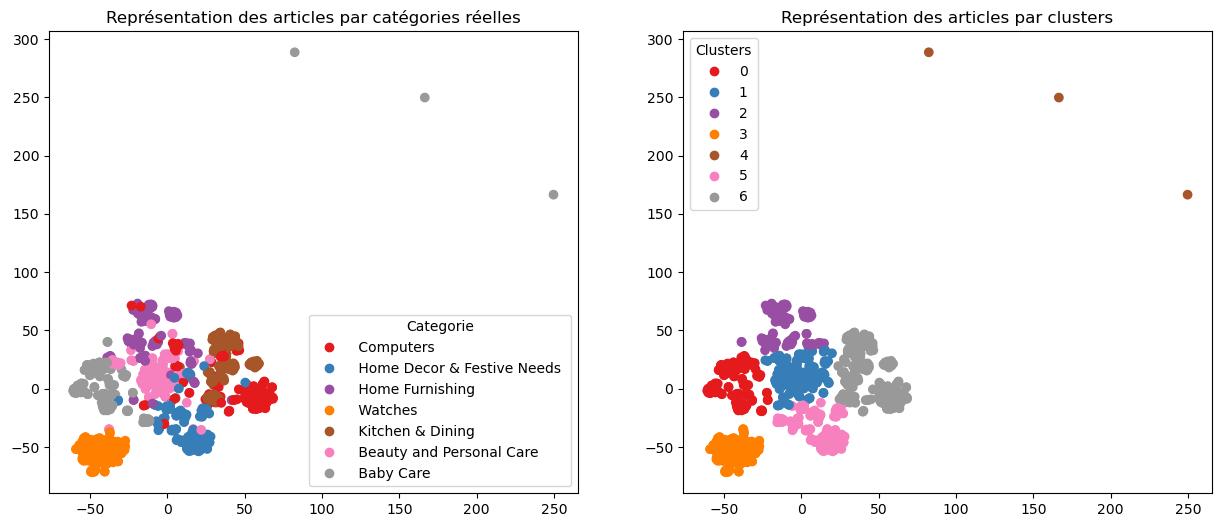

ARI :  0.656


In [37]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_name_bow)

# Word2Vec

In [49]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
sentences = data_T_name['bow_w_l'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [50]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4635
Word2Vec trained


In [51]:
# Préparation des sentences (tokenization)
maxlen = 24
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4636


## Création de la matrice d'embedding

In [52]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4636, 300)


## Création du modèle d'embedding

In [59]:
m_l = [16,32,64,128,256,512]
m_score = 0

for y in m_l:
    x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=y,
                                                     padding='post') 
                                                   
    num_words = len(tokenizer.word_index) + 1
    input=Input(shape=(len(x_sentences),y),dtype='float64')
    word_input=Input(shape=(y,),dtype='float64')  
    word_embedding=Embedding(input_dim=vocab_size,
                            output_dim=w2v_size,
                             weights = [embedding_matrix],
                             input_length=y)(word_input)
    word_vec=GlobalAveragePooling1D()(word_embedding)  
    embed_model = Model([word_input],word_vec)

    embeddings = embed_model.predict(x_sentences)
    for h in a:
        ARI, X_tsne, labels = ARI_fct(embeddings,h)
        if ARI > m_score:
            m_score = ARI
            p_max_length = y
            p_perplexity = h
print('ARI max =',m_score,'max_length:',p_max_length,'perplexity:',p_perplexity)

2023-01-26 10:14:46.359160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


33/33 [==============================] - 0s 1ms/step
ARI :  0.3387 time :  15.0
ARI :  0.3373 time :  15.0
ARI :  0.3671 time :  12.0
ARI :  0.3577 time :  12.0
ARI :  0.325 time :  11.0
33/33 [==============================] - 0s 2ms/step
ARI :  0.4591 time :  13.0
ARI :  0.5335 time :  16.0
ARI :  0.4863 time :  12.0
ARI :  0.4843 time :  14.0
ARI :  0.4315 time :  11.0
33/33 [==============================] - 0s 2ms/step
ARI :  0.4237 time :  13.0
ARI :  0.5232 time :  12.0
ARI :  0.5476 time :  9.0
ARI :  0.5327 time :  15.0
ARI :  0.5242 time :  8.0
33/33 [==============================] - 0s 2ms/step
ARI :  0.5611 time :  13.0
ARI :  0.5418 time :  10.0
ARI :  0.5421 time :  14.0
ARI :  0.5416 time :  14.0
ARI :  0.5376 time :  8.0
33/33 [==============================] - 0s 3ms/step
ARI :  0.5631 time :  14.0
ARI :  0.5513 time :  12.0
ARI :  0.5581 time :  12.0
ARI :  0.5441 time :  10.0
ARI :  0.5428 time :  12.0
33/33 [==============================] - 0s 5ms/step
ARI :  0.45

## Exécution du modèle

In [53]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

NameError: name 'embed_model' is not defined

In [54]:
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=512,
                                                     padding='post')
input=Input(shape=(len(x_sentences),(512)),dtype='float64')
word_input=Input(shape=(512,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                        output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=512)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embeddings = embed_model.predict(x_sentences)

33/33 [==============================] - 0s 7ms/step


In [55]:
 ARI_name_emb, X_tsne, labels = ARI_fct(embeddings,30)

ARI :  0.573 time :  20.0


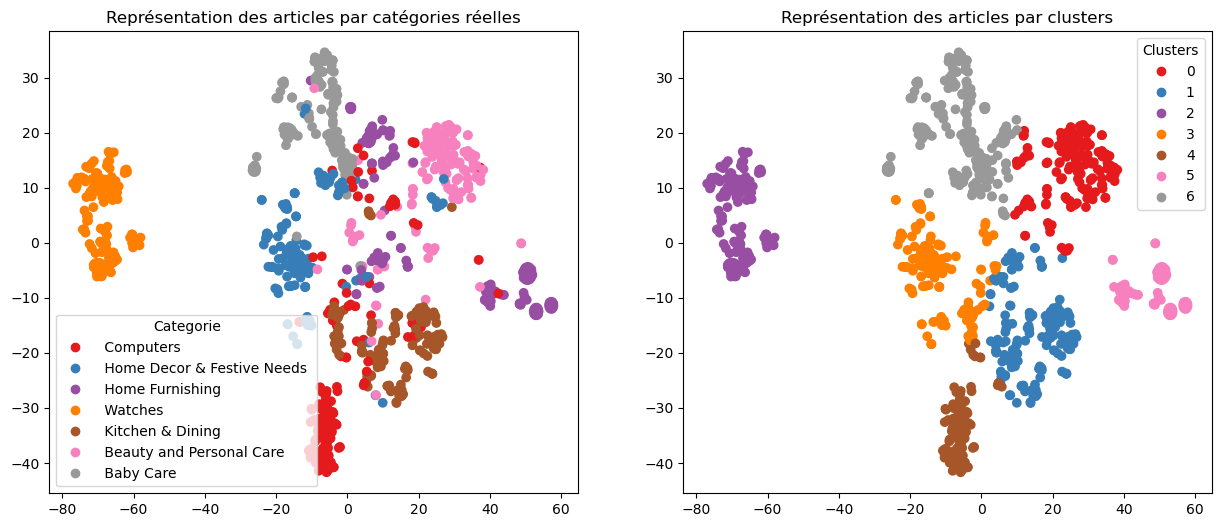

ARI :  0.573


In [56]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_name_emb)

# BERT

## BERT HuggingFace

### 'bert-base-uncased'

In [57]:
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = data_T_name['dl'].to_list()

In [68]:
# Création des features
b_s = [5,10,25,50,105]
m_l = [16,32,64,128,256,512]
m_score = 0
for i in b_s:
    for y in m_l:
        features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                                 y, i, mode='HF')
        for h in a:
            ARI, X_tsne, labels = ARI_fct(features_bert,h)
            if ARI > m_score:
                m_score = ARI
                p_batch_size = i
                p_max_length = y
                p_perplexity = h
print('ARI max =',m_score,'avec batch_size:',p_batch_size,'max_length:',p_max_length,'perplexity:',p_perplexity)

1/1 [==============================] - 0s 158ms/step
temps traitement :  50.0
ARI :  0.3808 time :  14.0
ARI :  0.4891 time :  16.0
ARI :  0.466 time :  13.0
ARI :  0.4732 time :  16.0
ARI :  0.4425 time :  10.0
1/1 [==============================] - 0s 289ms/step


1/1 [==============================] - 0s 283ms/step
temps traitement :  77.0
ARI :  0.4303 time :  13.0
ARI :  0.4238 time :  12.0
ARI :  0.4733 time :  12.0
ARI :  0.4965 time :  11.0
ARI :  0.3957 time :  9.0
1/1 [==============================] - 0s 458ms/step


1/1 [==============================] - 0s 461ms/step
temps traitement :  123.0
ARI :  0.417 time :  14.0
ARI :  0.4298 time :  15.0
ARI :  0.4096 time :  17.0
ARI :  0.3958 time :  18.0
ARI :  0.3642 time :  11.0
1/1 [==============================] - 1s 949ms/step
temps traitement :  229.0
ARI :  0.344 time :  13.0
ARI :  0.3283 time :  15.0
ARI :  0.3147 time :  15.0
ARI :  0.2958 time :  10.0
ARI :  0.3017 time :  15.0
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 5s 5s/step
temps traitement :  473.0
ARI :  0.3199 time :  15.0
ARI :  0.3405 time :  15.0
ARI :  0.3378 time :  17.0
ARI :  0.281 time :  11.0
ARI :  0.2936 time :  13.0
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step
temps traitement :  1080.0
ARI :  0.3005 time :  15.0
ARI :  0.3125 time :  16.0
ARI :  0.2821 time :  11.0
ARI :  0.2948 time :  15.0
ARI :  0.3142 time :  23.0
1/1 [==============================] - 0s 282ms/step
temps traitement :  43.0
ARI :  0.4958 time :  14.0
ARI :  0.4987 time :  17.0
ARI :  0.4199 time :  17.0
ARI :  0.4292 time :  12.0
ARI :  0.4696 time :  9.0
1/1 [==============================] - 0s 471ms/step
temps traitement :  61.0
ARI :  0.4616 time :  15.0
ARI :  0.4719 time :  16.0
ARI :  0.5025 time :  13.0
ARI :  0.4838 time :  12.0
ARI :  0.4246 time :  8.0
1/1 [==============================] - 1s 837ms/step


1/1 [==============================] - 1s 826ms/step
temps traitement :  102.0
ARI :  0.4114 time :  14.0
ARI :  0.4184 time :  15.0
ARI :  0.415 time :  17.0
ARI :  0.3803 time :  16.0
ARI :  0.3746 time :  13.0
1/1 [==============================] - 2s 2s/step
temps traitement :  214.0
ARI :  0.3456 time :  13.0
ARI :  0.3112 time :  15.0
ARI :  0.314 time :  14.0
ARI :  0.2486 time :  14.0
ARI :  0.3253 time :  20.0
1/1 [==============================] - 4s 4s/step
temps traitement :  449.0
ARI :  0.3158 time :  15.0
ARI :  0.3304 time :  10.0
ARI :  0.3395 time :  15.0
ARI :  0.299 time :  10.0
ARI :  0.3177 time :  12.0
1/1 [==============================] - 10s 10s/step


1/1 [==============================] - 9s 9s/step
temps traitement :  1042.0
ARI :  0.3373 time :  15.0
ARI :  0.3207 time :  16.0
ARI :  0.289 time :  14.0
ARI :  0.336 time :  17.0
ARI :  0.2918 time :  11.0
1/1 [==============================] - 1s 626ms/step
temps traitement :  30.0
ARI :  0.4958 time :  15.0
ARI :  0.4987 time :  17.0
ARI :  0.4199 time :  17.0
ARI :  0.4292 time :  12.0
ARI :  0.4696 time :  9.0
1/1 [==============================] - 1s 1s/step
temps traitement :  53.0
ARI :  0.4564 time :  14.0
ARI :  0.465 time :  15.0
ARI :  0.473 time :  15.0
ARI :  0.4763 time :  11.0
ARI :  0.4328 time :  8.0
1/1 [==============================] - 2s 2s/step
temps traitement :  99.0
ARI :  0.4114 time :  13.0
ARI :  0.4184 time :  15.0
ARI :  0.415 time :  17.0
ARI :  0.3803 time :  16.0
ARI :  0.3746 time :  13.0
1/1 [==============================] - 5s 5s/step
temps traitement :  223.0
ARI :  0.3399 time :  14.0
ARI :  0.3159 time :  16.0
ARI :  0.3079 time :  10.0
ARI :

1/1 [==============================] - 1s 1s/step
temps traitement :  27.0
ARI :  0.465 time :  14.0
ARI :  0.4798 time :  18.0
ARI :  0.5099 time :  18.0
ARI :  0.4676 time :  21.0
ARI :  0.495 time :  20.0
1/1 [==============================] - 2s 2s/step
temps traitement :  50.0
ARI :  0.4303 time :  15.0
ARI :  0.4238 time :  13.0
ARI :  0.4733 time :  14.0
ARI :  0.4965 time :  12.0
ARI :  0.3957 time :  10.0
1/1 [==============================] - 5s 5s/step
temps traitement :  100.0
ARI :  0.4132 time :  16.0
ARI :  0.4336 time :  16.0
ARI :  0.4163 time :  19.0
ARI :  0.3848 time :  14.0
ARI :  0.3688 time :  19.0
1/1 [==============================] - 10s 10s/step
temps traitement :  213.0
ARI :  0.344 time :  13.0
ARI :  0.3283 time :  16.0
ARI :  0.3147 time :  15.0
ARI :  0.2958 time :  11.0
ARI :  0.3017 time :  14.0
1/1 [==============================] - 20s 20s/step
temps traitement :  455.0
ARI :  0.3163 time :  13.0
ARI :  0.3366 time :  12.0
ARI :  0.3334 time :  8.0
A

In [58]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                                 16, 50, mode='HF')
ARI_name_bert, X_tsne, labels = ARI_fct(features_bert,30)

1/1 [==============================] - 2s 2s/step
temps traitement :  42.0
ARI :  0.4607 time :  29.0


In [59]:
features_bert.shape

(1050, 768)

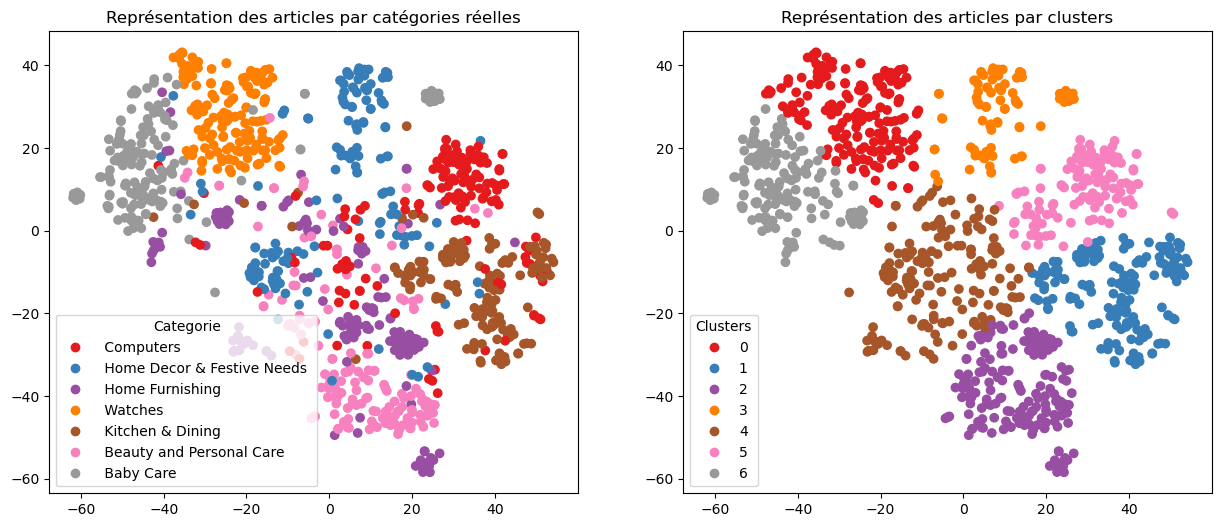

ARI :  0.4607


In [60]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_name_bert)

## BERT hub Tensorflow

In [61]:
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [62]:
sentences = data_T_name['dl'].to_list()

In [63]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  179.0


In [81]:
# Création des features
b_s = [5,10,25,50,105]
m_l = [16,32,64,128,256,512]
m_score = 0
for i in b_s:
    for y in m_l:
        features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         y, i, mode='TFhub')
        for h in a:
            ARI, X_tsne, labels = ARI_fct(features_bert,h)
            if ARI > m_score:
                m_score = ARI
                p_batch_size = i
                p_max_length = y
                p_perplexity = h
print('ARI max =',m_score,'avec batch_size:',p_batch_size,'max_length:',p_max_length,'perplexity:',p_perplexity)

temps traitement :  40.0
ARI :  0.436 time :  15.0
ARI :  0.4976 time :  9.0
ARI :  0.456 time :  15.0
ARI :  0.4619 time :  9.0
ARI :  0.4886 time :  13.0
temps traitement :  70.0
ARI :  0.5252 time :  14.0
ARI :  0.4478 time :  15.0
ARI :  0.4872 time :  14.0
ARI :  0.4706 time :  8.0
ARI :  0.4524 time :  12.0
temps traitement :  142.0
ARI :  0.4106 time :  16.0
ARI :  0.4206 time :  19.0
ARI :  0.3991 time :  14.0
ARI :  0.3851 time :  19.0
ARI :  0.3032 time :  13.0
temps traitement :  253.0
ARI :  0.3487 time :  14.0
ARI :  0.3507 time :  15.0
ARI :  0.2986 time :  12.0
ARI :  0.2964 time :  13.0
ARI :  0.3147 time :  13.0
temps traitement :  510.0
ARI :  0.3183 time :  10.0
ARI :  0.3364 time :  13.0
ARI :  0.3361 time :  17.0
ARI :  0.287 time :  18.0
ARI :  0.3061 time :  10.0
temps traitement :  1308.0
ARI :  0.3011 time :  14.0
ARI :  0.3033 time :  11.0
ARI :  0.2869 time :  17.0
ARI :  0.3217 time :  9.0
ARI :  0.2891 time :  25.0
temps traitement :  38.0
ARI :  0.4669 tim

In [64]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         32, 5, mode='TFhub')
ARI_name_bert_hub, X_tsne, labels = ARI_fct(features_bert,10)

temps traitement :  115.0
ARI :  0.4521 time :  30.0


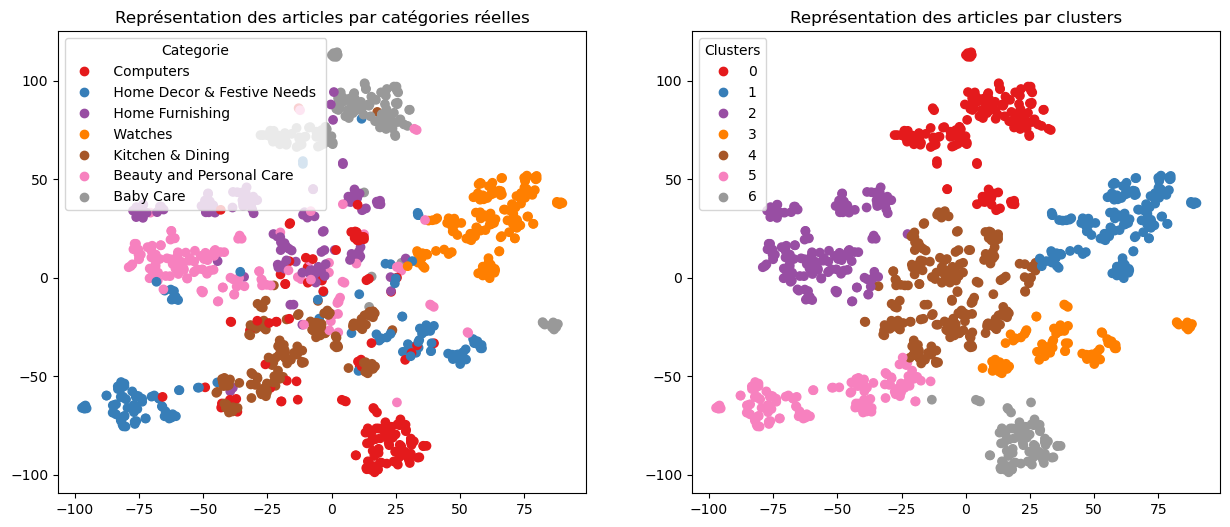

ARI :  0.4521


In [65]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_name_bert_hub)

# USE - Universal Sentence Encoder

In [66]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [67]:
batch_size = 10
sentences = data_T_name['dl'].to_list()

In [91]:
# Création des features
b_s = [5,10,25,50,105]
m_l = [16,32,64,128,256,512]
m_score = 0
for i in b_s:
    features_USE = feature_USE_fct(sentences, i)
    for h in a:
        ARI, X_tsne, labels = ARI_fct(features_USE,h)
        if ARI > m_score:
            m_score = ARI
            p_batch_size = i
            p_perplexity = h
print('ARI max =',m_score,'avec batch_size:',p_batch_size,'perplexity:',p_perplexity)

ARI :  0.5904 time :  13.0
ARI :  0.5375 time :  15.0
ARI :  0.6834 time :  9.0
ARI :  0.5861 time :  16.0
ARI :  0.5702 time :  22.0
ARI :  0.5873 time :  15.0
ARI :  0.5688 time :  15.0
ARI :  0.5744 time :  9.0
ARI :  0.5675 time :  12.0
ARI :  0.5612 time :  15.0
ARI :  0.5881 time :  15.0
ARI :  0.5865 time :  18.0
ARI :  0.5344 time :  19.0
ARI :  0.5497 time :  17.0
ARI :  0.5307 time :  10.0
ARI :  0.5795 time :  14.0
ARI :  0.5405 time :  16.0
ARI :  0.6536 time :  21.0
ARI :  0.688 time :  14.0
ARI :  0.566 time :  11.0
ARI :  0.5904 time :  16.0
ARI :  0.5657 time :  17.0
ARI :  0.6007 time :  18.0
ARI :  0.6534 time :  14.0
ARI :  0.5626 time :  17.0
ARI max = 0.688 avec batch_size: 50 perplexity: 40


In [73]:
features_USE = feature_USE_fct(sentences, 50)

In [74]:
ARI_name_use, X_tsne, labels = ARI_fct(features_USE,40)

ARI :  0.688 time :  30.0


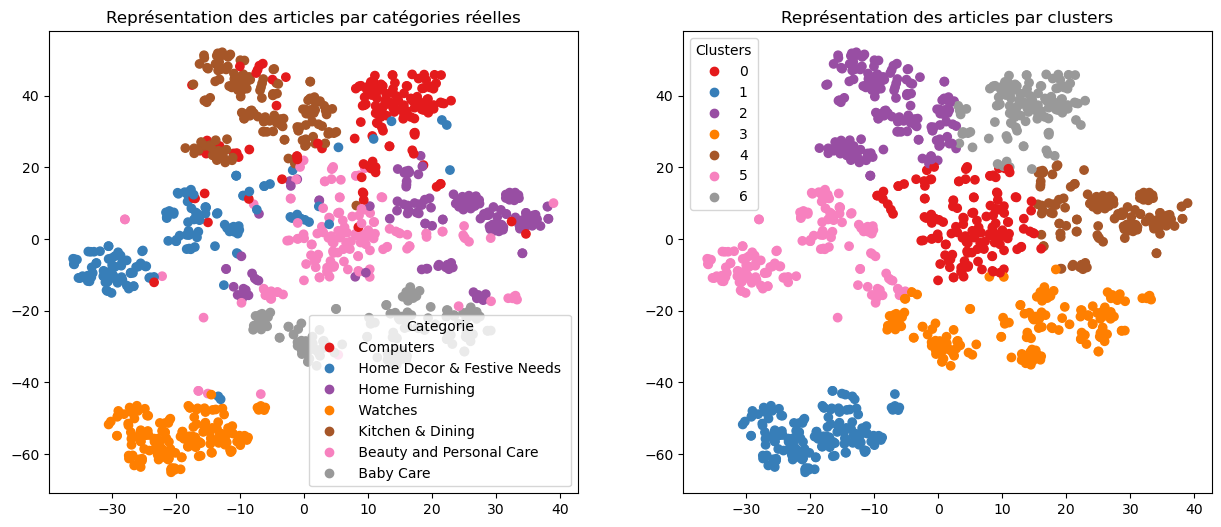

ARI :  0.688


In [75]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_name_use)

In [76]:
score_name = pd.DataFrame()
score_name['Algorithmes'] = ['Bag_of_words','Embedding','BERT','BERT_hub','USE']
score_name['ARI_score'] = [ARI_name_bow,ARI_name_emb,ARI_name_bert,ARI_name_bert_hub,ARI_name_use]

In [77]:
score_name

Algorithmes  ARI_score
0  Bag_of_words     0.6560
1     Embedding     0.5730
2          BERT     0.4607
3      BERT_hub     0.4521
4           USE     0.6880

# Image Features Extraction

In [96]:
import numpy as np
import pandas as pd
import os
import glob as glob
import zipfile
import shutil

import PIL
import cv2
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob as glob

In [97]:
data_T0['image'] = ['/Users/matrice/Documents/Projet_6/Flipkart 2/Images/'+item for item in data_T0['image']]

In [98]:
data_im = data_T0[['image','maincat']]

In [99]:
data_im

image            maincat
0     /Users/matrice/Documents/Projet_6/Flipkart 2/I...   Home Furnishing 
1     /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
2     /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
3     /Users/matrice/Documents/Projet_6/Flipkart 2/I...   Home Furnishing 
4     /Users/matrice/Documents/Projet_6/Flipkart 2/I...   Home Furnishing 
...                                                 ...                ...
1045  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
1046  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
1047  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
1048  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
1049  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 

[1050 rows x 2 columns]

In [103]:
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for path in data_im['image'] :
    try:
        image = cv2.imread(path,0) # convert in gray
        #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        res = cv2.equalizeHist(image)   # equalize image histogram
        kp, des = sift.detectAndCompute(res, None)
        sift_keypoints.append(des)
    except:
        continue

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

[ WARN:0@33412.898] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/matrice/Documents/Projet_6/Flipkart 2/Images/0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg'): can't open/read file: check file path/integrity
/var/folders/wj/f3qh8pz91pj20k0f45jfz41m0000gn/T/ipykernel_700/1928092368.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (516851, 128)
temps de traitement SIFT descriptor :           484.45 secondes


In [114]:
data_im

image            maincat
0     /Users/matrice/Documents/Projet_6/Flipkart 2/I...   Home Furnishing 
1     /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
2     /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
3     /Users/matrice/Documents/Projet_6/Flipkart 2/I...   Home Furnishing 
4     /Users/matrice/Documents/Projet_6/Flipkart 2/I...   Home Furnishing 
...                                                 ...                ...
1045  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
1046  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
1047  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
1048  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 
1049  /Users/matrice/Documents/Projet_6/Flipkart 2/I...         Baby Care 

[1050 rows x 2 columns]

In [117]:
data_im.loc[data_im['image']=='/Users/matrice/Documents/Projet_6/Flipkart 2/Images/0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg']

image  \
625  /Users/matrice/Documents/Projet_6/Flipkart 2/I...   

                          maincat  
625   Home Decor & Festive Needs

In [119]:
data_im.drop(625,inplace = True)

/var/folders/wj/f3qh8pz91pj20k0f45jfz41m0000gn/T/ipykernel_700/2035338919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_im.drop(625,inplace = True)


In [121]:
data_im.drop(625,inplace = True)

TypeError: 'Int64Index' object is not callable

In [134]:
l_cat = list(set(data_im['maincat']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_im.iloc[i]['maincat'])) for i in range(len(data_im))]

catégories :  [' Baby Care ', ' Home Furnishing ', ' Kitchen & Dining ', ' Beauty and Personal Care ', ' Watches ', ' Home Decor & Festive Needs ', ' Computers ']


In [135]:
len(l_cat)

7

In [136]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             5.44 secondes


In [137]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : 
        print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : 
        print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             7.46 secondes


In [138]:
im_features.dtype

dtype('float64')

In [139]:
len(im_features)

1049

In [140]:
a = [10,20,30,40,50]
for i in a:
    ARI, X_tsne, labels = ARI_fct(im_features,i)

ARI :  0.0628 time :  15.0
ARI :  0.0434 time :  17.0
ARI :  0.0662 time :  12.0
ARI :  0.0348 time :  13.0
ARI :  0.0443 time :  14.0


In [141]:
ARI_sift, X_tsne, labels = ARI_fct(im_features,30)

ARI :  0.0662 time :  13.0


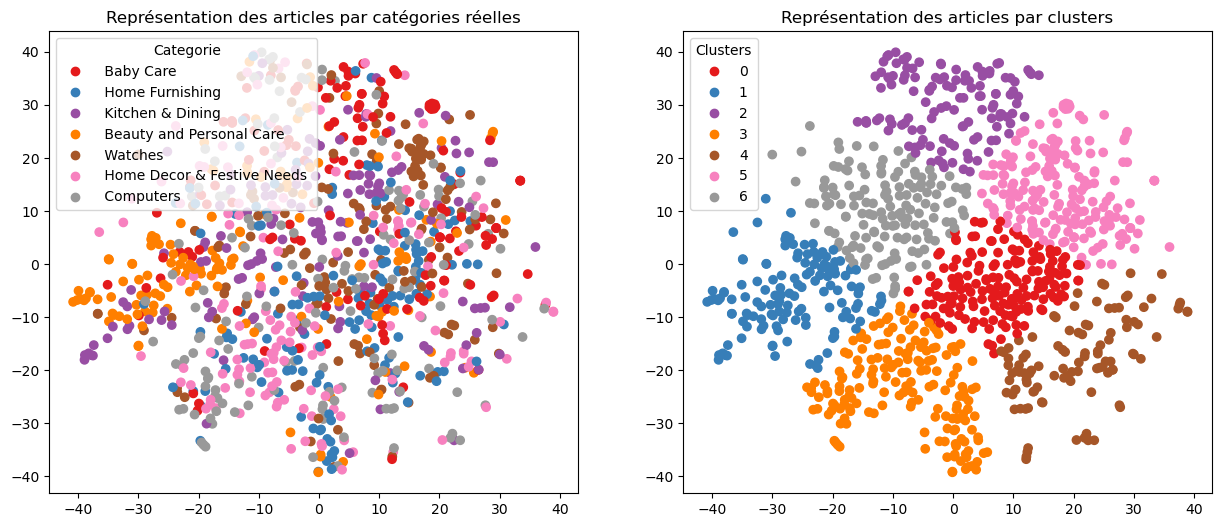

ARI :  0.0662


In [142]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_sift)

In [143]:
import tensorflow as tf
import keras.utils as image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()


vgg16_feature_list = []

for img_path in data_im['image']:
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())

vgg16_feature_list_np = np.array(vgg16_feature_list)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

1/1 [==============================] - 0s 207ms/step


1/1 [==============================] - 0s 211ms/step


/Users/matrice/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 211ms/step


1/1 [==============================] - 0s 250ms/step


In [156]:
a = [10,20,30,40,50]
for i in a:
    ARI, X_tsne, labels = ARI_fct(vgg16_feature_list_np,i)

ARI :  0.266 time :  17.0
ARI :  0.2755 time :  19.0
ARI :  0.3075 time :  21.0
ARI :  0.2906 time :  17.0
ARI :  0.32 time :  12.0


ARI :  0.32 time :  13.0


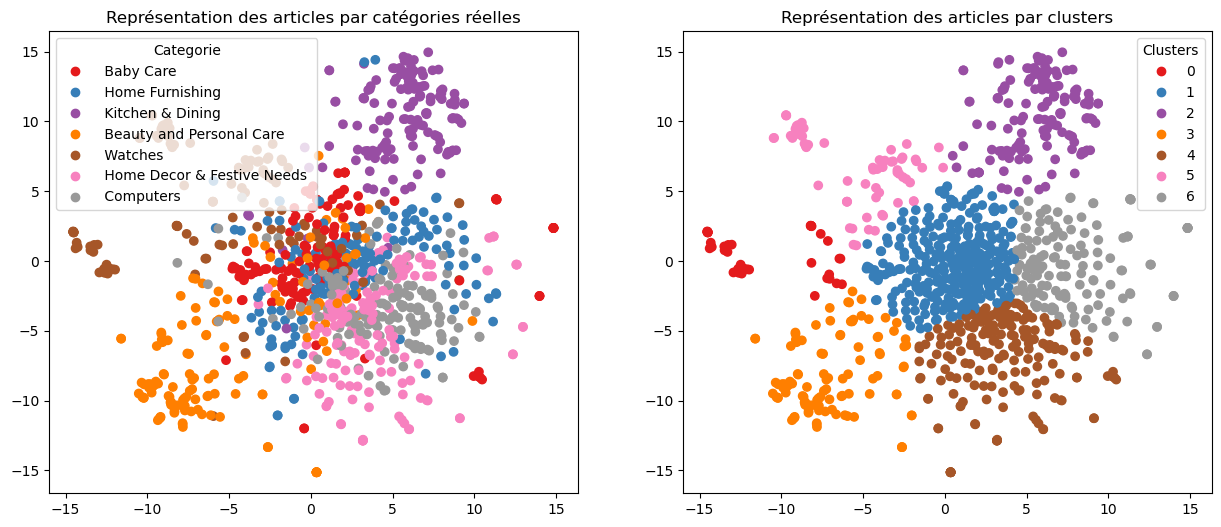

ARI :  0.32


In [157]:
ARI_vgg, X_tsne, labels = ARI_fct(vgg16_feature_list_np,50)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_vgg)

In [146]:
vgg16_feature_list_np.shape

(1049, 25088)

In [147]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

In [148]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_18[0][0]']               
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [149]:
inception_feature_list = []

for img_path in data_im['image']:
    img = image.load_img(img_path, target_size=(150, 150))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    inception_feature = base_model.predict(img_data)
    inception_feature_np = np.array(inception_feature)
    inception_feature_list.append(inception_feature_np.flatten())

inception_feature_list_np = np.array(inception_feature_list)

1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 54ms/step


/Users/matrice/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 51ms/step


In [152]:
a = [10,20,30,40,50]
for i in a:
    ARI, X_tsne, labels = ARI_fct(inception_feature_list_np,i)

ARI :  0.0451 time :  27.0
ARI :  0.0393 time :  12.0
ARI :  0.0396 time :  16.0
ARI :  0.0514 time :  19.0
ARI :  0.0582 time :  23.0


ARI :  0.0396 time :  14.0


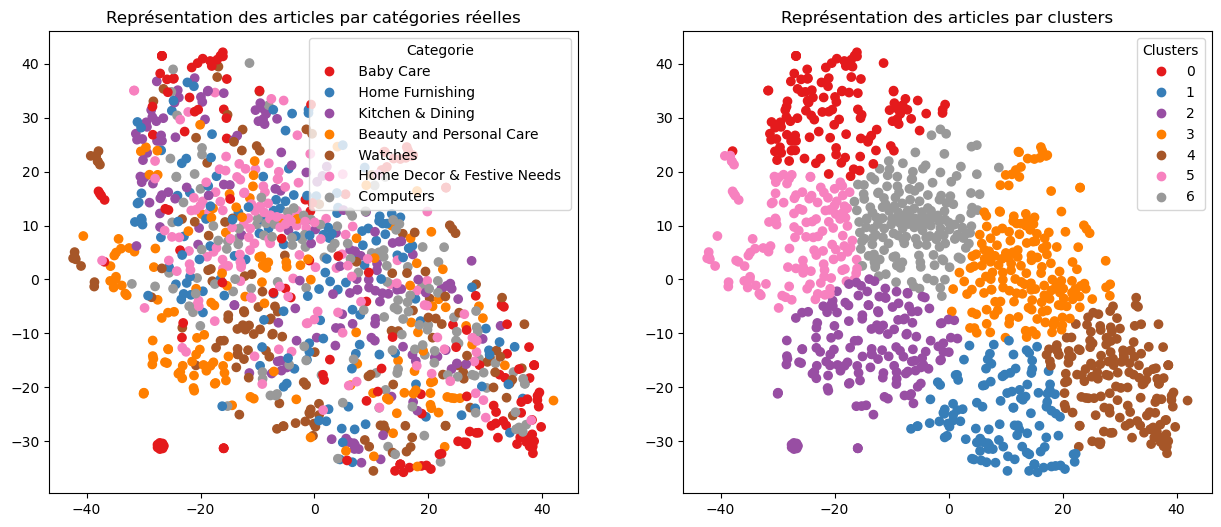

ARI :  0.0396


In [153]:
ARI_inception, X_tsne, labels = ARI_fct(inception_feature_list_np,30)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_inception)

In [154]:
inception_feature_list_np.shape

(1049, 18432)

In [155]:
score_im = pd.DataFrame()
score_im['Algorithmes'] = ['SIFT','VGG_16','Inception_V3']
score_im['ARI_score'] = [ARI_sift,ARI_vgg,ARI_inception]

In [158]:
score_im

Algorithmes  ARI_score
0          SIFT     0.0662
1        VGG_16     0.3200
2  Inception_V3     0.0396

## Concaténation des features images et texte

In [168]:
features_USE

array([[-0.05350369, -0.05353191, -0.00274167, ...,  0.03363004,
         0.04448627, -0.02077915],
       [-0.03900095, -0.01701755, -0.01682678, ...,  0.01404849,
         0.04666725,  0.0324195 ],
       [-0.05453083, -0.03708895, -0.04555684, ...,  0.04943433,
         0.00607562, -0.04149957],
       ...,
       [ 0.02537984,  0.04839356, -0.00594583, ..., -0.04503092,
         0.06420073, -0.0678082 ],
       [ 0.00509254,  0.03031498,  0.05843767, ...,  0.00139033,
        -0.04334722, -0.04855876],
       [-0.0304557 ,  0.05463909,  0.06569483, ...,  0.02070838,
        -0.05140918, -0.03920218]], dtype=float32)

In [172]:
len(features_USE)

1050

In [173]:
 x = np.delete(features_USE, 625,0)

In [175]:
len(x)

1049

In [179]:
f_text = np.array(x)
f_im = np.array(vgg16_feature_list_np)

In [180]:
f_text.shape

(1049, 512)

In [181]:
f_im.shape

(1049, 25088)

In [182]:
A = np.hstack((f_im, f_text))

In [183]:
a = [10,20,30,40,50]
for i in a:
    ARI, X_tsne, labels = ARI_fct(A,i)

ARI :  0.2499 time :  16.0
ARI :  0.3129 time :  19.0
ARI :  0.3281 time :  16.0
ARI :  0.2875 time :  16.0
ARI :  0.3111 time :  20.0


ARI :  0.3281 time :  16.0


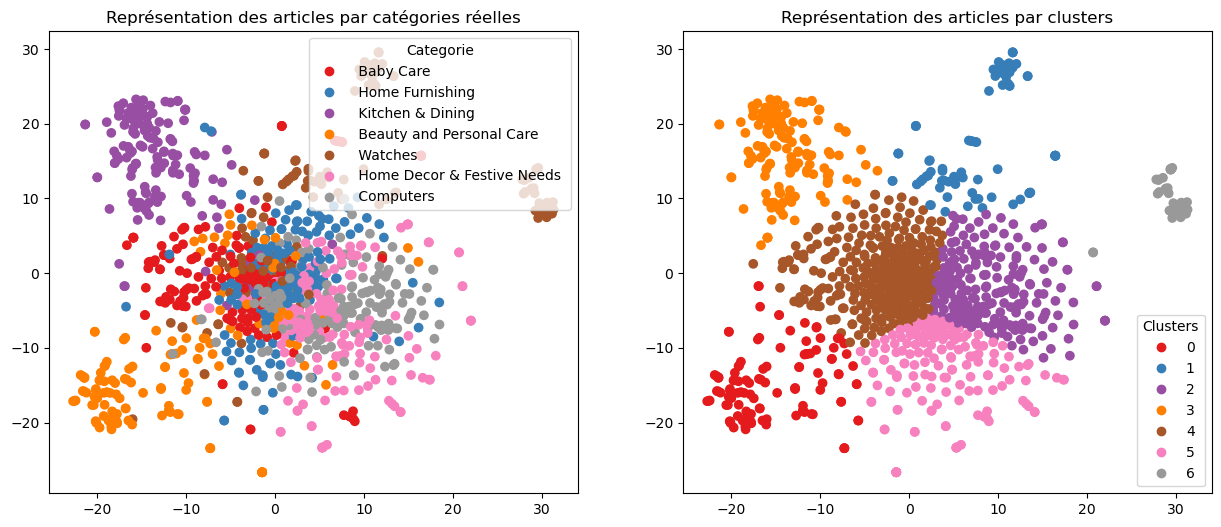

ARI :  0.3281


In [185]:
ARI, X_tsne, labels = ARI_fct(A,30)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)